# Analyse des données des systèmes éducatifs
## Objectif
#### Analyser les données des systèmes éducatifs pour comprendre les facteurs qui influencent la qualité de l'éducation.
## Méthode
#### 1. Importation des données
#### 2. Nettoyage des données
#### 3. Analyse exploratoire des données
#### 4. Modélisation des données
#### 5. Visualisation des données
#### 6. Interprétation des résultats
#

# 1. Importation des données et exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df_data = pd.read_csv('data/EdStatsData.csv')
df_data.head(20)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,65.993584,67.301857,68.219078,69.059013,69.914551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_country = pd.read_csv('data/EdStatsCountry.csv')
df_country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [4]:
df_country_series = pd.read_csv('data/EdStatsCountry-Series.csv')
df_country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [5]:
df_footnote = pd.read_csv('data/EdStatsFootNote.csv')
df_footnote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [6]:
df_series = pd.read_csv('data/EdStatsSeries.csv')
df_series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Collecte des informations de chaque jeu de données
#### Maintenant que l'ensemble des données sont importé correctement et définis dans des dataframes, nous allons les
#### explorer pour comprendre les informations qu'elles contiennent.

#### pour que notre collecte d'informations soit plus facile, nous allons créer une fonction qui nous permettra de
#### récupérer les informations de chaque dataframe.

In [7]:
def analyse_dataframe(df, df_name):
    print(f"Analyse du fichier: {df_name}")
    
    # Définir ce que représente une ligne
    print("Définition d'une ligne:")
    if 'Country Name' in df.columns and 'Indicator Name' in df.columns:
        print("Une ligne représente une combinaison de pays et d'indicateur.")
    elif 'Country Name' in df.columns:
        print("Une ligne représente un pays.")
    elif 'Indicator Name' in df.columns:
        print("Une ligne représente un indicateur.")
    elif 'Country Code' in df.columns and 'Description' in df.columns:
        print("Une ligne représente une description spécifique à un pays.")
    else:
        print("Autre chose.")
    
    # Calculer le nombre de lignes et de colonnes
    print(f"Nombre de lignes: {df.shape[0]}")
    print(f"Nombre de colonnes: {df.shape[1]}")
    
    # Calculer le nombre de doublons
    num_duplicates = df.duplicated().sum()
    print(f"Nombre de doublons: {num_duplicates}")
    
    # Supprimer les doublons
    if num_duplicates > 0:
        df = df.drop_duplicates()
        print("Doublons supprimés.")
    
    # Calculer la proportion de valeurs manquantes par colonne
    missing_values = df.isnull().mean() * 100
    print("Proportion de valeurs manquantes par colonne (%):")
    print(missing_values)
    
    # Supprimer les colonnes inutilisables (plus de 20% de valeurs manquantes)
    threshold = 20
    cols_to_drop = missing_values[missing_values > threshold].index
    df = df.drop(columns=cols_to_drop)
    print(f"Colonnes supprimées (plus de {threshold}% de valeurs manquantes): {list(cols_to_drop)}")
    
    # Calculer les statistiques descriptives pour les colonnes numériques
    print("Statistiques descriptives pour les colonnes numériques:")
    print(df.describe())
    
    # Calculer le nombre d'occurrences de chaque valeur possible pour les colonnes catégorielles
    print("Nombre d'occurrences pour les colonnes catégorielles:")
    for col in df.select_dtypes(include=['object']).columns:
        print(f"Colonne: {col}")
        print(df[col].value_counts())
    
    return df

In [8]:
df_country = analyse_dataframe(df_country, 'EdStatsCountry.csv')

Analyse du fichier: EdStatsCountry.csv
Définition d'une ligne:
Autre chose.
Nombre de lignes: 241
Nombre de colonnes: 32
Nombre de doublons: 0
Proportion de valeurs manquantes par colonne (%):
Country Code                                           0.000000
Short Name                                             0.000000
Table Name                                             0.000000
Long Name                                              0.000000
2-alpha code                                           1.244813
Currency Unit                                         10.788382
Special Notes                                         39.834025
Region                                                11.203320
Income Group                                          11.203320
WB-2 code                                              0.414938
National accounts base year                           14.937759
National accounts reference year                      86.721992
SNA price valuation                    

In [9]:
df_country_series = analyse_dataframe(df_country_series, 'EdStatsCountry-Series.csv')

Analyse du fichier: EdStatsCountry-Series.csv
Définition d'une ligne:
Autre chose.
Nombre de lignes: 613
Nombre de colonnes: 4
Nombre de doublons: 0
Proportion de valeurs manquantes par colonne (%):
CountryCode      0.0
SeriesCode       0.0
DESCRIPTION      0.0
Unnamed: 3     100.0
dtype: float64
Colonnes supprimées (plus de 20% de valeurs manquantes): ['Unnamed: 3']
Statistiques descriptives pour les colonnes numériques:
       CountryCode   SeriesCode  \
count          613          613   
unique         211           21   
top            GEO  SP.POP.TOTL   
freq            18          211   

                                              DESCRIPTION  
count                                                 613  
unique                                                 97  
top     Data sources : United Nations World Population...  
freq                                                  154  
Nombre d'occurrences pour les colonnes catégorielles:
Colonne: CountryCode
CountryCode
GEO    18
M

In [10]:
df_footnote = analyse_dataframe(df_footnote, 'EdStatsFootNote.csv')

Analyse du fichier: EdStatsFootNote.csv
Définition d'une ligne:
Autre chose.
Nombre de lignes: 643638
Nombre de colonnes: 5
Nombre de doublons: 0
Proportion de valeurs manquantes par colonne (%):
CountryCode      0.0
SeriesCode       0.0
Year             0.0
DESCRIPTION      0.0
Unnamed: 4     100.0
dtype: float64
Colonnes supprimées (plus de 20% de valeurs manquantes): ['Unnamed: 4']
Statistiques descriptives pour les colonnes numériques:
       CountryCode   SeriesCode    Year   DESCRIPTION
count       643638       643638  643638        643638
unique         239         1558      56          9102
top            LIC  SH.DYN.MORT  YR2004  Country Data
freq          7320         9226   27128        191188
Nombre d'occurrences pour les colonnes catégorielles:
Colonne: CountryCode
CountryCode
LIC    7320
CYP    7183
LDC    6481
SSA    6389
SSF    6336
       ... 
IMN      32
CUW      23
XKX      12
MNP       4
FRO       2
Name: count, Length: 239, dtype: int64
Colonne: SeriesCode
SeriesCo

In [11]:
df_series = analyse_dataframe(df_series, 'EdStatsSeries.csv')

Analyse du fichier: EdStatsSeries.csv
Définition d'une ligne:
Une ligne représente un indicateur.
Nombre de lignes: 3665
Nombre de colonnes: 21
Nombre de doublons: 0
Proportion de valeurs manquantes par colonne (%):
Series Code                              0.000000
Topic                                    0.000000
Indicator Name                           0.000000
Short definition                        41.173261
Long definition                          0.000000
Unit of measure                        100.000000
Periodicity                             97.298772
Base Period                             91.432469
Other notes                             84.938608
Aggregation method                      98.717599
Limitations and exceptions              99.618008
Notes from original source             100.000000
General comments                        99.618008
Source                                   0.000000
Statistical concept and methodology     99.372442
Development relevance             

In [12]:
df_data = analyse_dataframe(df_data, 'EdStatsData.csv')

Analyse du fichier: EdStatsData.csv
Définition d'une ligne:
Une ligne représente une combinaison de pays et d'indicateur.
Nombre de lignes: 886930
Nombre de colonnes: 70
Nombre de doublons: 0
Proportion de valeurs manquantes par colonne (%):
Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1970               91.849639
                     ...    
2085               94.200670
2090               94.200670
2095               94.200670
2100               94.200670
Unnamed: 69       100.000000
Length: 70, dtype: float64
Colonnes supprimées (plus de 20% de valeurs manquantes): ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2

#### Avant de continuer Visualisons les valeurs manquantes dans chaque dataframe. Cela nous permettra de voir
#### rapidement quelles colonnes contiennent des valeurs manquantes et de décider si nous devons les supprimer ou les
#### remplir.


In [13]:
def plot_missing_values_heatmap(df, df_name):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.isnull(), cmap='cool')
    plt.title(f'Heatmap des valeurs manquantes pour {df_name}')
    plt.show()

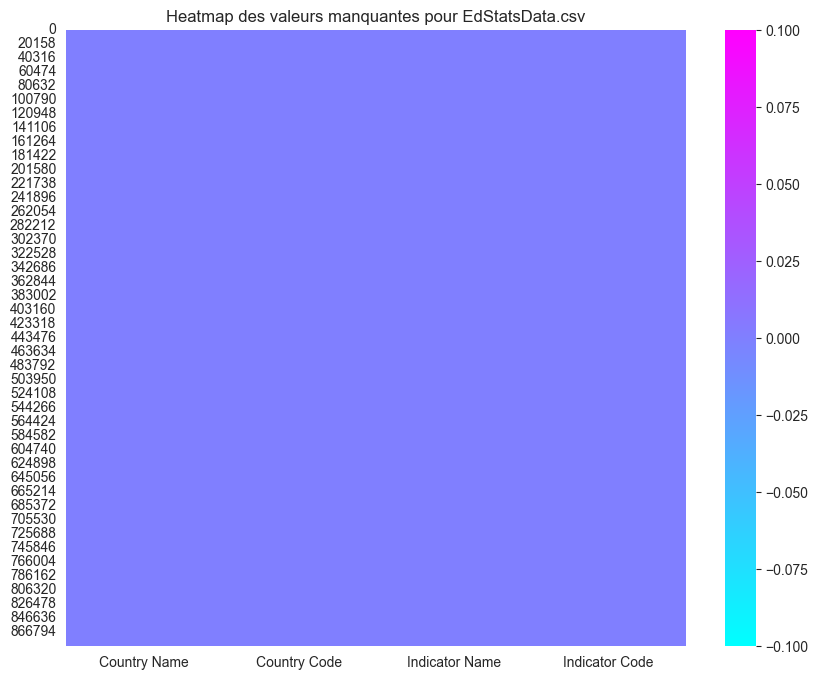

In [14]:
plot_missing_values_heatmap(df_data, 'EdStatsData.csv')

In [15]:
df_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR


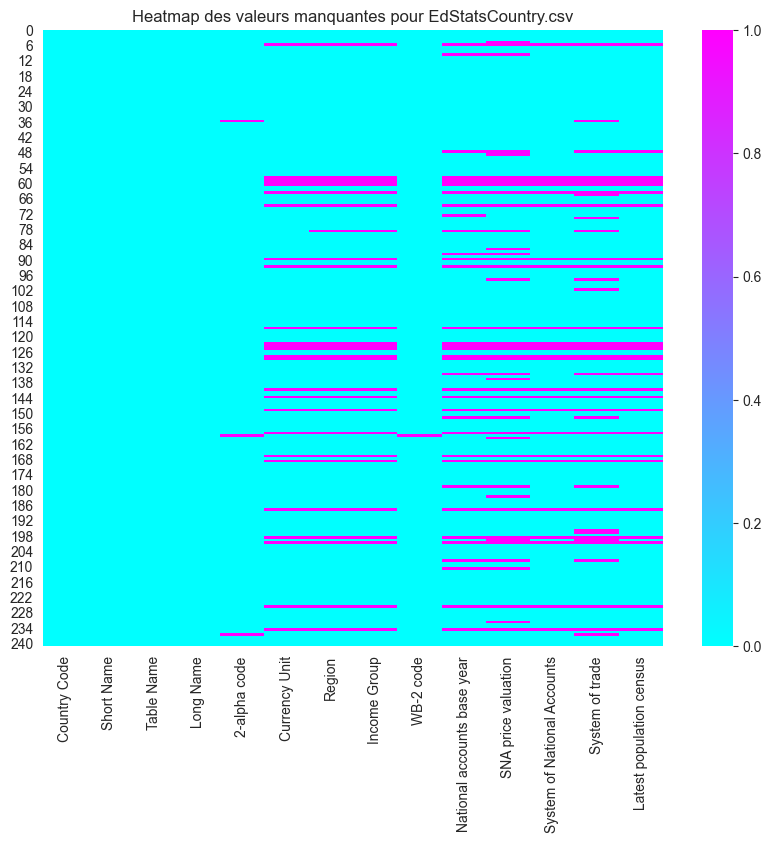

In [16]:
plot_missing_values_heatmap(df_country, 'EdStatsCountry.csv')

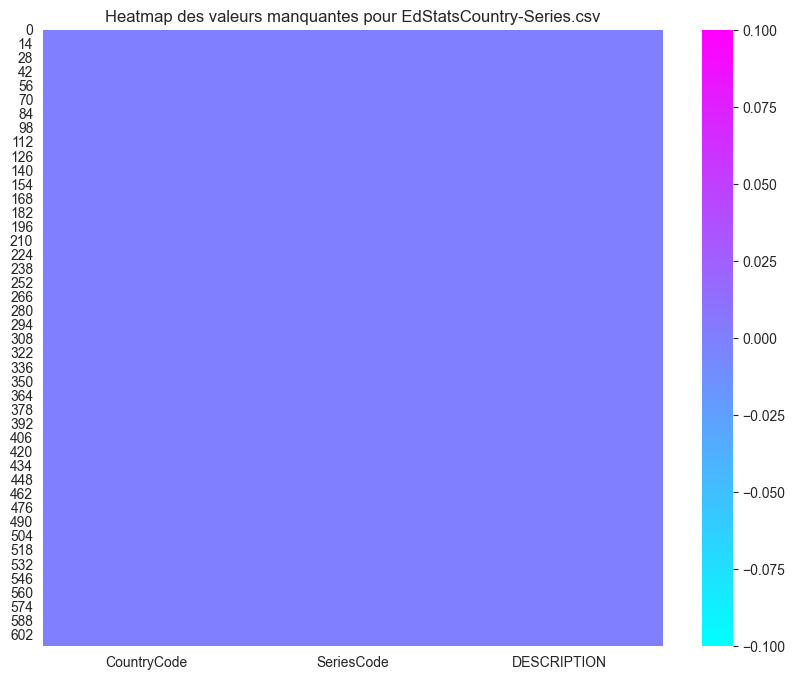

In [17]:
plot_missing_values_heatmap(df_country_series, 'EdStatsCountry-Series.csv')

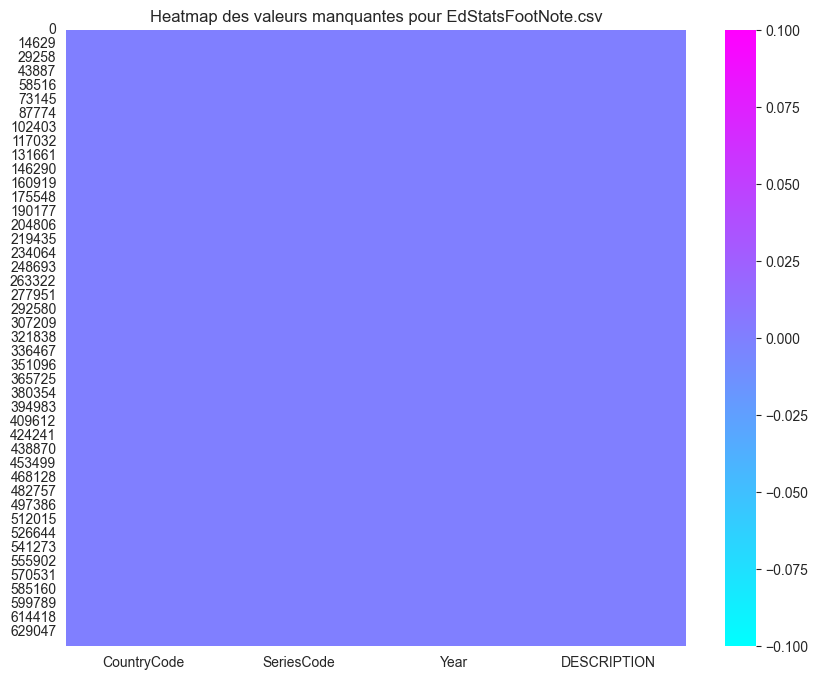

In [18]:
plot_missing_values_heatmap(df_footnote, 'EdStatsFootNote.csv')

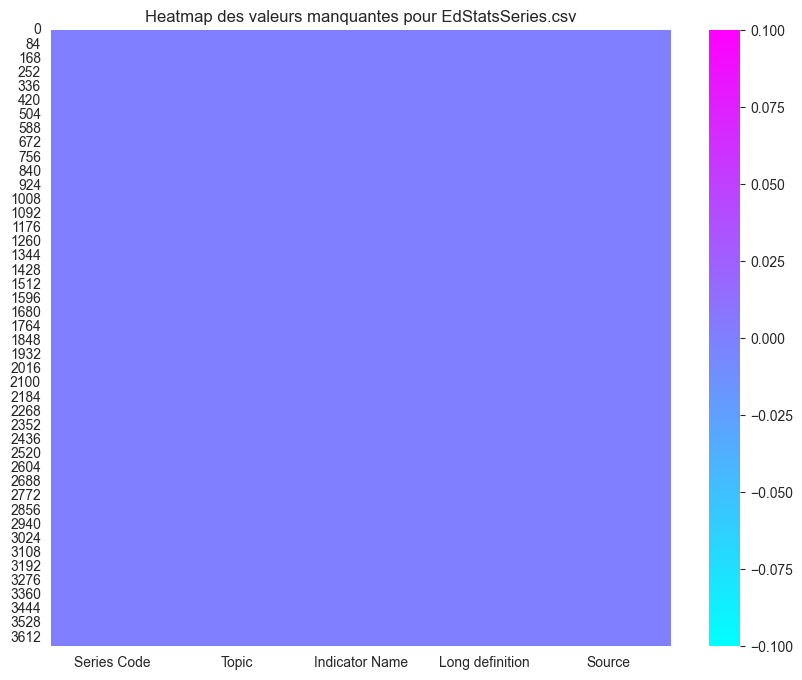

In [19]:
plot_missing_values_heatmap(df_series, 'EdStatsSeries.csv')

# Exception ici pour le fichier EdStatsData.csv car il contient beaucoup de données manquantes en fonction des indicateurs
# Nous allons donc supprimer les lignes avec plus de 50% de valeurs manquantes
# pour ne garder que les indicateurs les plus pertinents

In [20]:
df_data = df_data.dropna(thresh=df_data.shape[1]//2)
missing_values = df_data.isnull().mean() * 100
print("Proportion de valeurs manquantes par colonne (%):")
print(missing_values)
threshold = 20
cols_to_drop = missing_values[missing_values > threshold].index
df_data = df_data.drop(columns=cols_to_drop)
print(f"Colonnes supprimées (plus de {threshold}% de valeurs manquantes): {list(cols_to_drop)}")

Proportion de valeurs manquantes par colonne (%):
Country Name      0.0
Country Code      0.0
Indicator Name    0.0
Indicator Code    0.0
dtype: float64
Colonnes supprimées (plus de 20% de valeurs manquantes): []


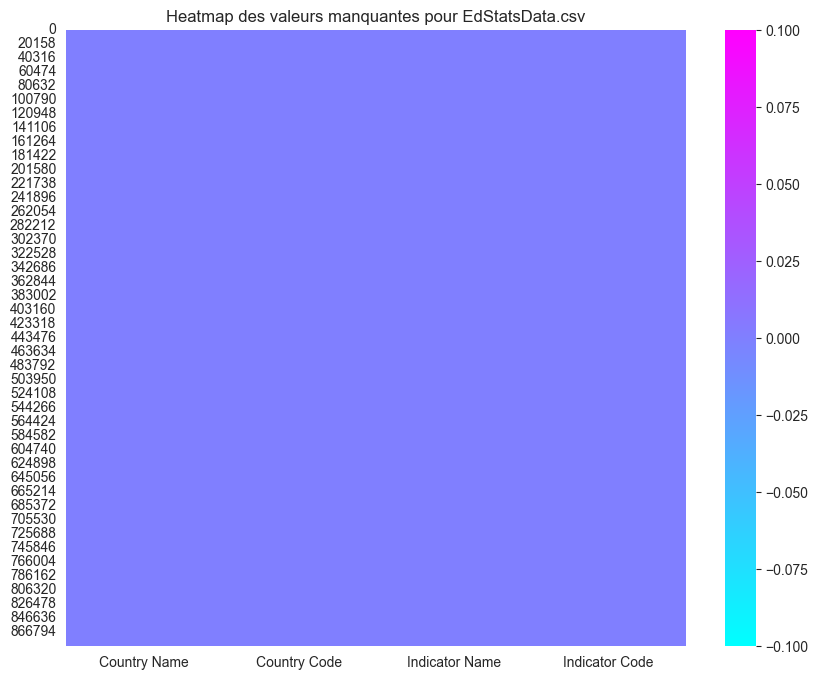

In [21]:
plot_missing_values_heatmap(df_data, 'EdStatsData.csv')

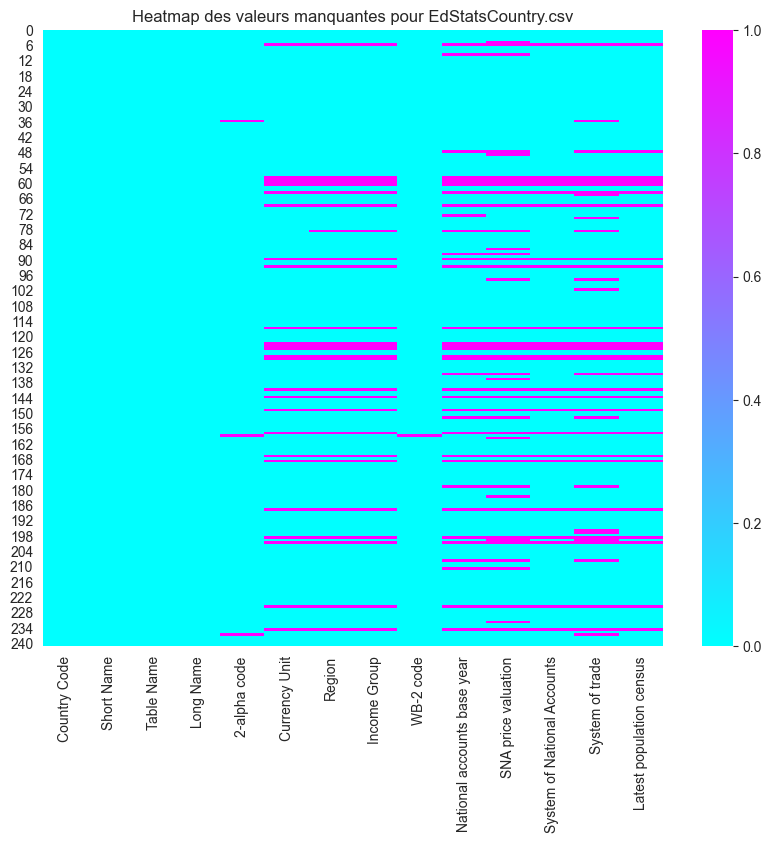

In [22]:
plot_missing_values_heatmap(df_country, 'EdStatsCountry.csv')

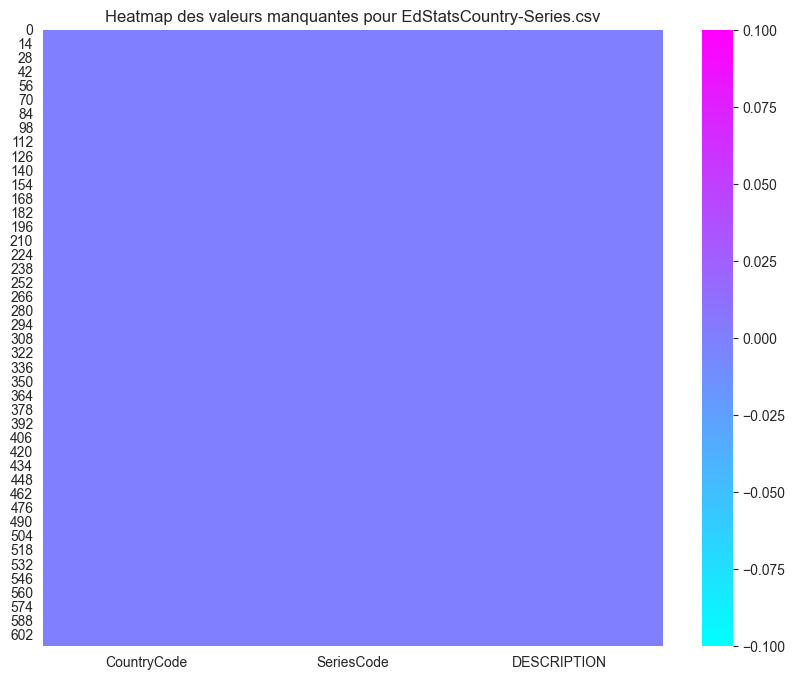

In [23]:
plot_missing_values_heatmap(df_country_series, 'EdStatsCountry-Series.csv')

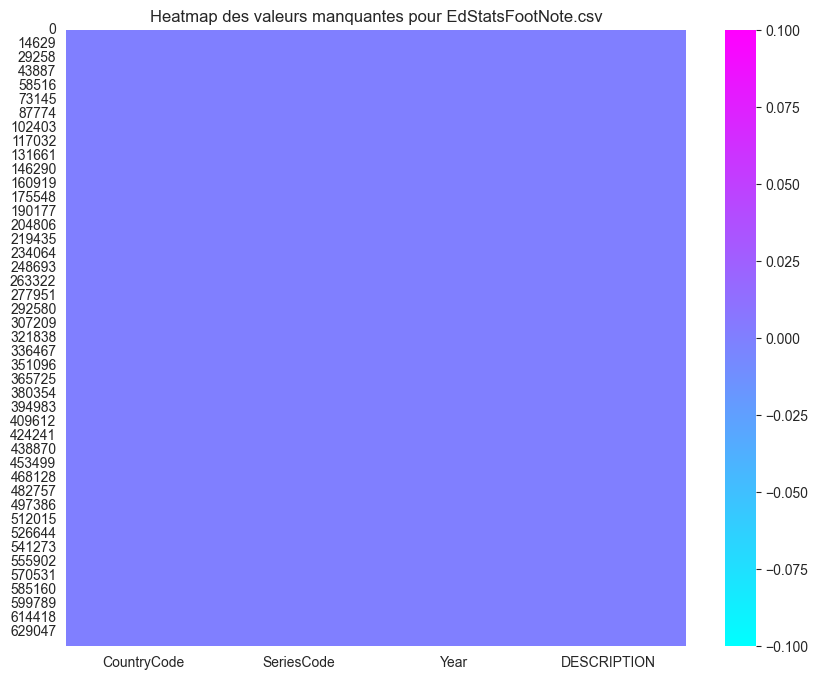

In [24]:
plot_missing_values_heatmap(df_footnote, 'EdStatsFootNote.csv')

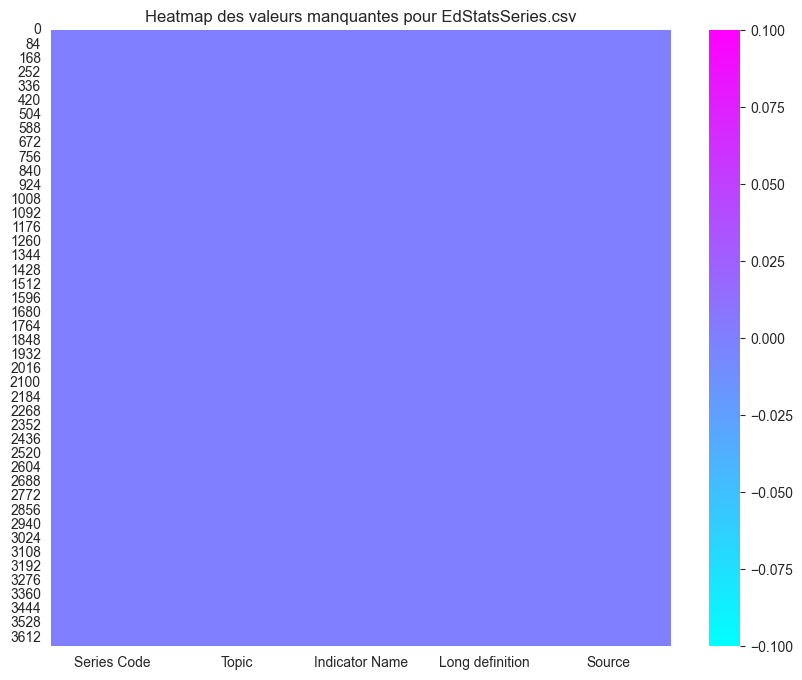

In [25]:
plot_missing_values_heatmap(df_series, 'EdStatsSeries.csv')

#### Après avoir analysé les données, nous pouvons voir que les dataframes contiennent des informations sur les pays, les indicateurs, les séries, les données et les notes de bas de page. Nous allons maintenant nettoyer les données pour les rendre plus faciles à analyser.

# 2. Nettoyage des données

### Nettoyage des données des pays
#### Nous allons commencer par nettoyer les données des pays. Nous allons supprimer les colonnes inutiles
#### et remplir les valeurs manquantes.

 


In [26]:
df_country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,System of National Accounts,System of trade,Latest population census
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,Sub-Saharan Africa,Upper middle income,AO,2002,Value added at producer prices (VAP),Country uses the 1993 System of National Accou...,Special trade system,1970
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,2011
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,Country uses the 1968 System of National Accou...,Special trade system,2011. Population figures compiled from adminis...


#### Affichage des données manquantes pour les pays

In [27]:
df_country.isnull().sum()

Country Code                    0
Short Name                      0
Table Name                      0
Long Name                       0
2-alpha code                    3
Currency Unit                  26
Region                         27
Income Group                   27
WB-2 code                       1
National accounts base year    36
SNA price valuation            44
System of National Accounts    26
System of trade                41
Latest population census       28
dtype: int64

#### Affichage du contenu unique de la colonne 'Region'

In [28]:
df_country['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [29]:
# afficher les pays qui n'ont pas de région
df_country[df_country['Region'].isnull()]['Table Name']

5                                          Arab World
57                                East Asia & Pacific
58            East Asia & Pacific (all income levels)
59                              Europe & Central Asia
60          Europe & Central Asia (all income levels)
63                                          Euro area
68                                     European Union
78                                          Gibraltar
89                                        High income
92             Heavily indebted poor countries (HIPC)
116                         Latin America & Caribbean
122     Latin America & Caribbean (all income levels)
123      Least developed countries: UN classification
124                                        Low income
127                               Lower middle income
128                               Low & middle income
140    Middle East & North Africa (all income levels)
143                                     Middle income
148                        M

#### Supprimer les pays n'appartenant à aucune région (car ils ne sont pas utiles pour notre analyse)

In [30]:
df_country = df_country.dropna(subset=['Region'])

#### Afficher la heatmap pour vérifier si les valeurs manquantes ont été supprimées

In [31]:
# suppression des lignes contenant encore des valeurs manquantes
df_country = df_country.dropna()

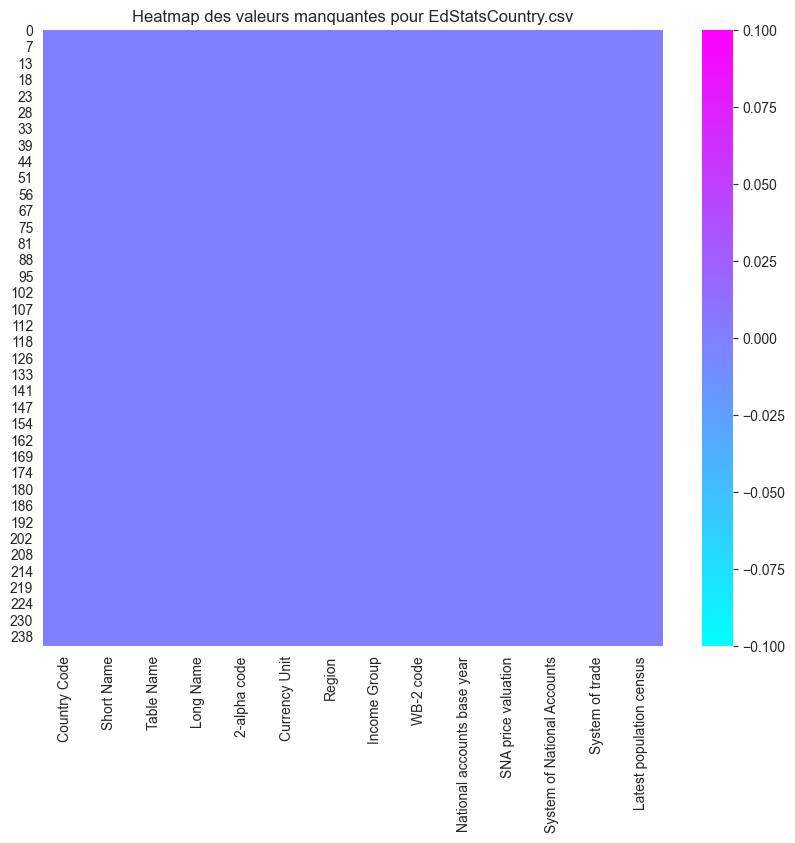

In [32]:
# vérifier
plot_missing_values_heatmap(df_country, 'EdStatsCountry.csv')

In [33]:
df_country['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

#### Supprimer les valeurs manquantes dans le df_data pour identifier les indicateurs pertinents

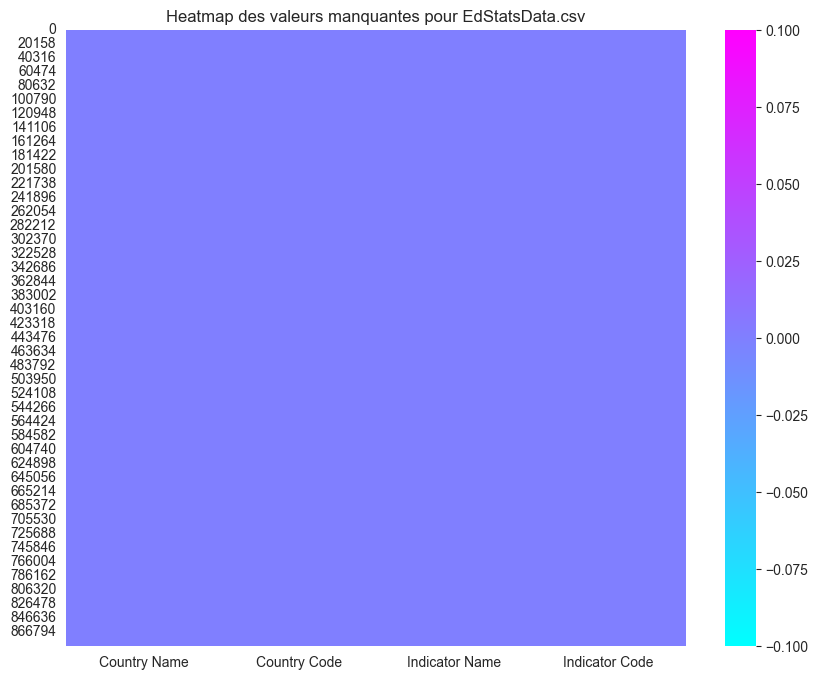

In [34]:
plot_missing_values_heatmap(df_data, 'EdStatsData.csv')

In [35]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Country Name    886930 non-null  object
 1   Country Code    886930 non-null  object
 2   Indicator Name  886930 non-null  object
 3   Indicator Code  886930 non-null  object
dtypes: object(4)
memory usage: 27.1+ MB


In [36]:
# Supprimer les lignes avec des valeurs manquantes supérieures à 50%
df_data = df_data.dropna(thresh=50, axis=0)

print(df_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    0 non-null      object
 1   Country Code    0 non-null      object
 2   Indicator Name  0 non-null      object
 3   Indicator Code  0 non-null      object
dtypes: object(4)
memory usage: 0.0+ bytes
None


In [37]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    0 non-null      object
 1   Country Code    0 non-null      object
 2   Indicator Name  0 non-null      object
 3   Indicator Code  0 non-null      object
dtypes: object(4)
memory usage: 0.0+ bytes


# 3 Recherche et identification de la catégorie métier pour chaque indicateur

In [38]:
df_series.head()

,Series Code,Topic,Indicator Name,Long definition,Source
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Robert J. Barro and Jong-Wha Lee: http://www.b...
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Robert J. Barro and Jong-Wha Lee: http://www.b...
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Robert J. Barro and Jong-Wha Lee: http://www.b...
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Robert J. Barro and Jong-Wha Lee: http://www.b...
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Robert J. Barro and Jong-Wha Lee: http://www.b...


In [39]:
df_series['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

In [40]:
# définir les catégories métiers pour chaque indicateur
df_series['Topic'].value_counts()


Topic
Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                                        256
Primary                                                                                          248
Population                                                                                       213
Tertiary                                                                                         158
Teachers                                                                                         137
Expenditures                                                                                      93
Engaging the Private Sector (SABER)                                                  

In [41]:
# afficher les indicateurs pour chaque catégorie métier
for topic in df_series['Topic'].unique():
    print(f"Catégorie métier: {topic}")
    print(df_series[df_series['Topic'] == topic]['Indicator Name'].unique())
    print()

Catégorie métier: Attainment
['Barro-Lee: Percentage of female population age 15-19 with no education'
 'Barro-Lee: Percentage of population age 15-19 with no education'
 'Barro-Lee: Percentage of female population age 15+ with no education'
 'Barro-Lee: Percentage of population age 15+ with no education'
 'Barro-Lee: Percentage of female population age 20-24 with no education'
 'Barro-Lee: Percentage of population age 20-24 with no education'
 'Barro-Lee: Percentage of female population age 25-29 with no education'
 'Barro-Lee: Percentage of population age 25-29 with no education'
 'Barro-Lee: Percentage of female population age 25+ with no education'
 'Barro-Lee: Percentage of population age 25+ with no education'
 'Barro-Lee: Percentage of female population age 30-34 with no education'
 'Barro-Lee: Percentage of population age 30-34 with no education'
 'Barro-Lee: Percentage of female population age 35-39 with no education'
 'Barro-Lee: Percentage of population age 35-39 with no edu

In [42]:
# Faire la liste des indicateurs avec leur serie code associé pour les catégories Learning Outcome et Attainment
indicators = df_series[df_series['Topic'].isin(['Learning Outcomes', 'Attainment'])][['Indicator Name', 'Series Code']]

# Sauvegarder les indicateurs dans un fichier CSV
indicators.to_csv('data/indicators.csv', index=False)

# Afficher les indicateurs
indicators


,Indicator Name,Series Code
0,Barro-Lee: Percentage of female population age...,BAR.NOED.1519.FE.ZS
1,Barro-Lee: Percentage of population age 15-19 ...,BAR.NOED.1519.ZS
2,Barro-Lee: Percentage of female population age...,BAR.NOED.15UP.FE.ZS
3,Barro-Lee: Percentage of population age 15+ wi...,BAR.NOED.15UP.ZS
4,Barro-Lee: Percentage of female population age...,BAR.NOED.2024.FE.ZS
...,...,...
2909,UIS: Percentage of population age 25+ with som...,UIS.EA.S1.AG25T99.F
2910,UIS: Percentage of population age 25+ with som...,UIS.EA.S1.AG25T99.M
2911,UIS: Percentage of population age 25+ with unk...,UIS.EA.UK.AG25T99
2912,UIS: Percentage of population age 25+ with unk...,UIS.EA.UK.AG25T99.F


In [43]:
df_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code


In [44]:
# Utilisation des indicateurs pour identifier les pays ayant les meilleures performances en matière d'éducation
# Sélection des indicateurs pertinents pour l'analyse
df_indicators = pd.read_csv('data/indicators.csv')
# creer un dataframe pour indicators.csv

# Filter df_data to include only the rows with the Series Codes from indicators.csv
filtered_data = df_data[df_data['Indicator Code'].isin(df_indicators['Series Code'])]

# Display the first few rows to verify
print(filtered_data.head())

Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code]
Index: []


# 4. Modélisation des données